In [23]:
"""
Test the functionality of a implementation of biome-specific K values
"""

'\nTest the functionality of a implementation of biome-specific K values\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import os, glob

In [2]:
path_to_netcdf = '/run/user/1000/gvfs/smb-share:server=134.2.5.43,share=esd01/data/mschmid/model_runs/runningSimus/Paper_2/steady_state/Ff_03/inidivual_plant_types/az/ll_output/NC'

In [3]:
results_az = {}

parameters = [
    "topographic__elevation",
    "topographic__steepest_slope",
    "soil__depth",
    "sediment__flux",
    "landform__ID",
    "precipitation",
    "erosion__rate",
    "tree_fpc",
    "grass_fpc",
    "shrub_fpc",
    "fluvial_erodibility__soil",
    "fluvial_erodibility__bedrock"
]

for p in parameters:
    results_az[p] = []

for file in sorted(glob.glob(os.path.join(path_to_netcdf,"*.nc")), key = os.path.getmtime):
    _dataDump = Dataset(file)
    for parameter in parameters:
        _cutDump = _dataDump.variables[parameter][:][0]
        #delete boundary nodes
        _cutDump = np.delete(_cutDump, 0 , axis = 0) 
        _cutDump = np.delete(_cutDump,-1 , axis = 0)
        _cutDump = np.delete(_cutDump, 0 , axis = 1)
        _cutDump = np.delete(_cutDump,-1 , axis = 1)
        
        results_az[parameter].append(_cutDump)

In [42]:
#create new set of arrays with mean-values for plotting
#Azucar
precipitation_timeseries_array_az   = [np.mean(p)*10 for p in results_az['precipitation']]
erosion_rate_timeseries_array_az    = [np.mean(e)*10000 for e in results_az['erosion__rate']]
tree_cover_timeseries_array_az  = [np.mean(v)*100 for v in results_az['tree_fpc']]
grass_cover_timeseries_array_az = [np.mean(v)*100 for v in results_az['shrub_fpc']]
shrub_cover_timeseries_array_az = [np.mean(v)*100 for v in results_az['grass_fpc']]
k_bedrock_timeseries_array_az   = [np.mean(k) for k in results_az['fluvial_erodibility__bedrock']]
k_soil_timeseries_array_az      = [np.mean(k) for k in results_az['fluvial_erodibility__soil']]
sediment_flux_timeseries_array_az  = [np.mean(s) for s in results_az['sediment__flux']]

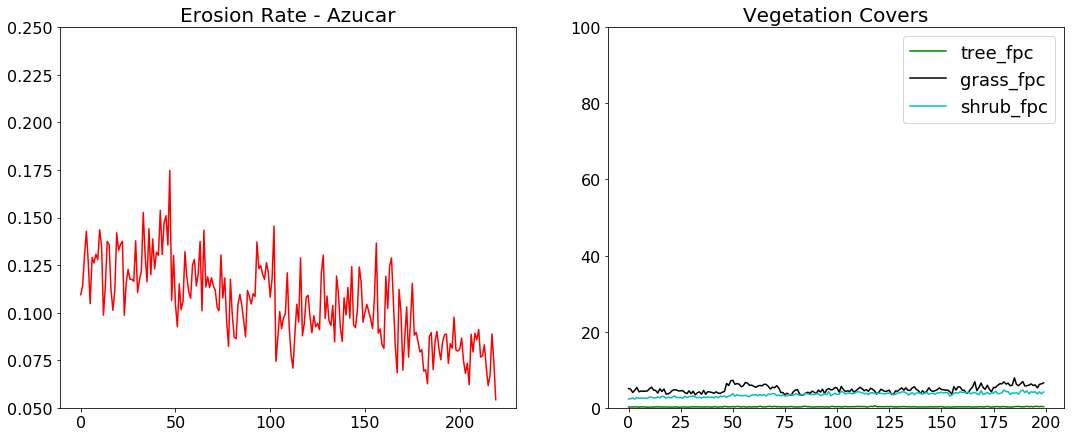

In [57]:
fig, ax = plt.subplots(1,2, figsize = [18,7])
ax[0].plot(erosion_rate_timeseries_array_az[9000:9220], 'r')
ax[0].set_ylim([0.05, 0.25])
ax[0].set_title('Erosion Rate - Azucar', fontsize = 20)
ax[0].axes.tick_params(labelsize = 16)

ax[1].plot(tree_cover_timeseries_array_az[9000:9200],  'g', label = 'tree_fpc')
ax[1].plot(grass_cover_timeseries_array_az[9000:9200], 'k', label = 'grass_fpc')
ax[1].plot(shrub_cover_timeseries_array_az[9000:9200], 'c', label = 'shrub_fpc')
ax[1].legend(fontsize = 18)
ax[1].set_ylim([0,100])
ax[1].set_title('Vegetation Covers', fontsize = 20)
ax[1].axes.tick_params(labelsize = 16)